# $t$-Test tested

In this post we shall try to run a quick experiment with the intention of convincing ourselves that $t$-test works.
We will examine what is the underlaying distribution of many different samples, obtained from many different distributions and with varying sizes.

In [1]:
# Modules used
%matplotlib inline
import pylab as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import scipy.stats as stats

## Definitions

**Hypothesis:** a statement about a population parameter. A population may be the users' traffic and the parameter may be conversion rate.

**Objectives:** given sample taken from the population, decide whether the *null-hypothesis* ($H_0$) holds or not.

## Example

A classical example is to consider the height of a population.
The null-hypothesis, $H_0$ would be that the the mean of heights is some $x_0$ and the alternative is that the mean is greater than $x_0$.
Ideally, we should measure the height of all members of the population, but this is going to be tricky.
Therefore, we take a sample from the population and measure the heights.
It is at this point that we want to check whether the average height of the sample suggests that $H_0$ holds or not.

In the following, we will simplify the example, and consider numbers obtained from a distribution.

## Fixed hypothesis on varying populations

In this experiment we fix $H_0=0$ and we apply the $t$-test on various samples obtained from different normal distributions.
We start with a fixed STD for the distribution and varying means:

In [2]:
dx = 0.5
means = np.arange(-10,10+dx,dx)
sizes = [10, 50, 100, 500, 1000]
STD=7

Next, for each size $n$ and mean $\mu$, we generate a sample of size $n$ with mean $\mu$.
Recall, the STD is fixed.

In [3]:
np.random.seed(10)
samples = pd.DataFrame()
for size in sizes:
    # For a fixed size, genearte list of samples, one sample for each mean
    fixed_size_samples = [pd.Series(np.random.normal(loc=mean, scale=STD, size=size)) for mean in means]
    samples[str(size)] = fixed_size_samples
samples.index=means

This generates a matrix each row has samples with the same mean and each column has samples with the same size.
Here are the first 3 rows:

In [4]:
samples[:-9] # Note that the index is the mean used!

,10,50,100,500,1000
-10.0,0 -0.678894 1 -4.993047 2 -20.817802 3...,0 -10.524642 1 -13.652435 2 -32.43080...,0 -27.265446 1 -10.563823 2 -10.58446...,0 -17.646876 1 -10.160807 2 -4.52...,0 -9.663611 1 -10.465285 2 -3.37...
-9.5,0 -6.468817 1 -1.078738 2 -16.255460 3...,0 -12.364884 1 -11.232327 2 1.19495...,0 -10.726570 1 -3.088564 2 -12.73566...,0 -4.085391 1 -11.314494 2 -14.69...,0 -19.126446 1 -17.442095 2 -16.99...
-9.0,0 -22.844098 1 -21.203606 2 -7.137509 3...,0 -11.256544 1 -13.660360 2 -13.93234...,0 -18.278745 1 -2.092716 2 -8.75227...,0 -14.869709 1 -3.125514 2 -12.06...,0 3.461343 1 -16.252981 2 -3.80...


Following is the histogram of the sample that has $500$ samples with mean $\mu = -8$

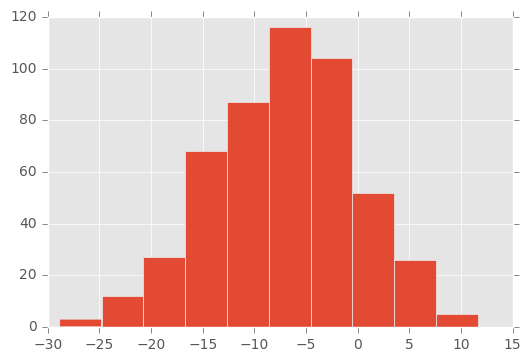

In [5]:
samples['500'][-8].hist();

It is natural to assume, based on the visual observation, that the sample was obtained from a normal distribution with mean between $-10$ and $-5$.
Which is indeed the case, the mean was $-8$.

Next, we will iterate over all the samples, and run a $t$-test against a fixed $H_0 = 0$.

In [6]:
p_vals = samples.applymap(lambda x: stats.ttest_1samp(x, 0)[1])
p_vals[:-9]

,10,50,100,500,1000
-10.0,0.000400,2.829029e-15,5.981424e-24,1.331176e-120,1.066282e-238
-9.5,0.003627,4.864909e-13,1.241612e-25,1.004769e-114,5.229695e-228
-9.0,0.066964,3.781487e-20,1.394775e-23,6.669121e-101,2.778635e-211


In the above table, each cell contains the $p$-value of the $t$-test of the corresponding sample against the fixed null-hypothesis $H_0 = 0$.

**What is the $p$-values?**

The $p$-value is the probability of observing the result under the assumption of $H_0$.
Recall, that a well accepted threshold for null-hypothesis rejection is $\alpha = 0.05$.
In other words, if the $p$-value is smaller than $\alpha$, we reject the null-hypothesis.
In the next step we mark with $1$ (i.e. accepted) the cases where the $p$-value was greater than $\alpha$ and with $0$ otherwise (i.e. rejected).

More intuitively, if the label is $0$, we can claim that mean of the distribution from which the sample was taken is *not* $0$.

In [7]:
accepted = p_vals.applymap(lambda p_val: 0 if p_val < 0.05 else 1)
accepted[:-9]

,10,50,100,500,1000
-10.0,0,0,0,0,0
-9.5,0,0,0,0,0
-9.0,1,0,0,0,0


Let us now plot a "heat-map" of the $0-1$ matrix above:

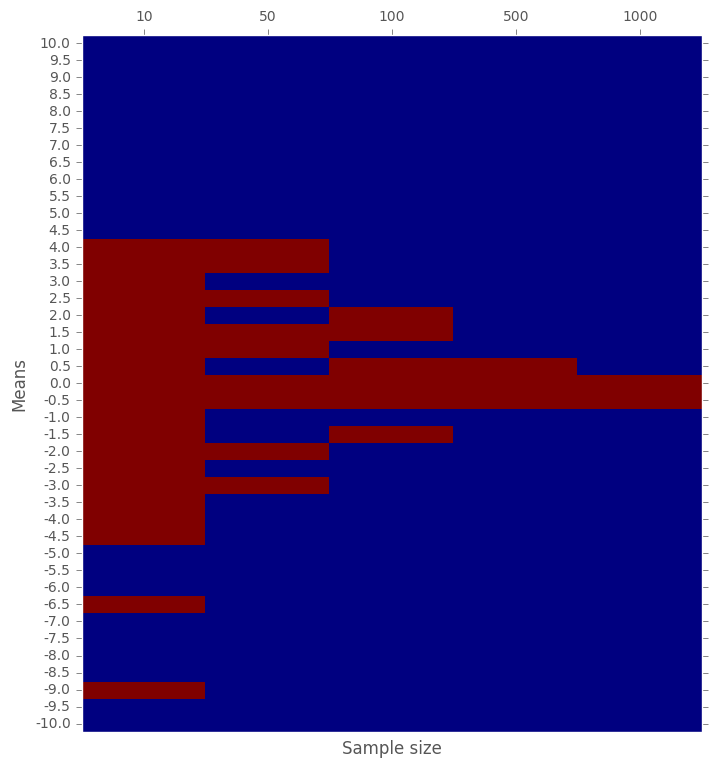

In [8]:
fig, ax = plt.subplots()
heatmap = ax.pcolormesh(accepted)

fig = plt.gcf()
fig.set_size_inches(8, 9)

plt.ylim(0,len(accepted.index))
ax.xaxis.tick_top()
ax.set_yticks(np.arange(len(accepted.index)) + 0.5, minor=False)
ax.set_yticklabels(accepted.index, minor=False)
ax.set_xticks(np.arange(len(accepted.columns)) + 0.5, minor=False)
ax.set_xticklabels(accepted.columns, minor=False)
plt.ylabel('Means')
plt.xlabel('Sample size')
ax.grid(True)

In the above graph, every red cell corresponds to a $t$-test of a sample with given size obtained from a normal distribution with given mean.

* RED: means that the null-hypothesis cannot be rejected. That is, the obtained sample is likely to be obtained given the null-hypothesis.
* BLUE: means that the null-hypothesis has to be rejected. That is, it is very unlikely that we witness the sample assuming $H_0$ holds.

We see, that the bigger the sample is, the more accurate the test is. 
Still, starting from a sample size of 50, we already manage to reject about $2/3$ of the samples.
It gets much better the denser the sample is.

## Links

- [What a p value tells you about statistical data](http://www.dummies.com/education/math/statistics/what-a-p-value-tells-you-about-statistical-data/)
- [SciPy Stats](https://docs.scipy.org/doc/scipy-0.18.1/reference/tutorial/stats.html)
- [t-Test SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp)